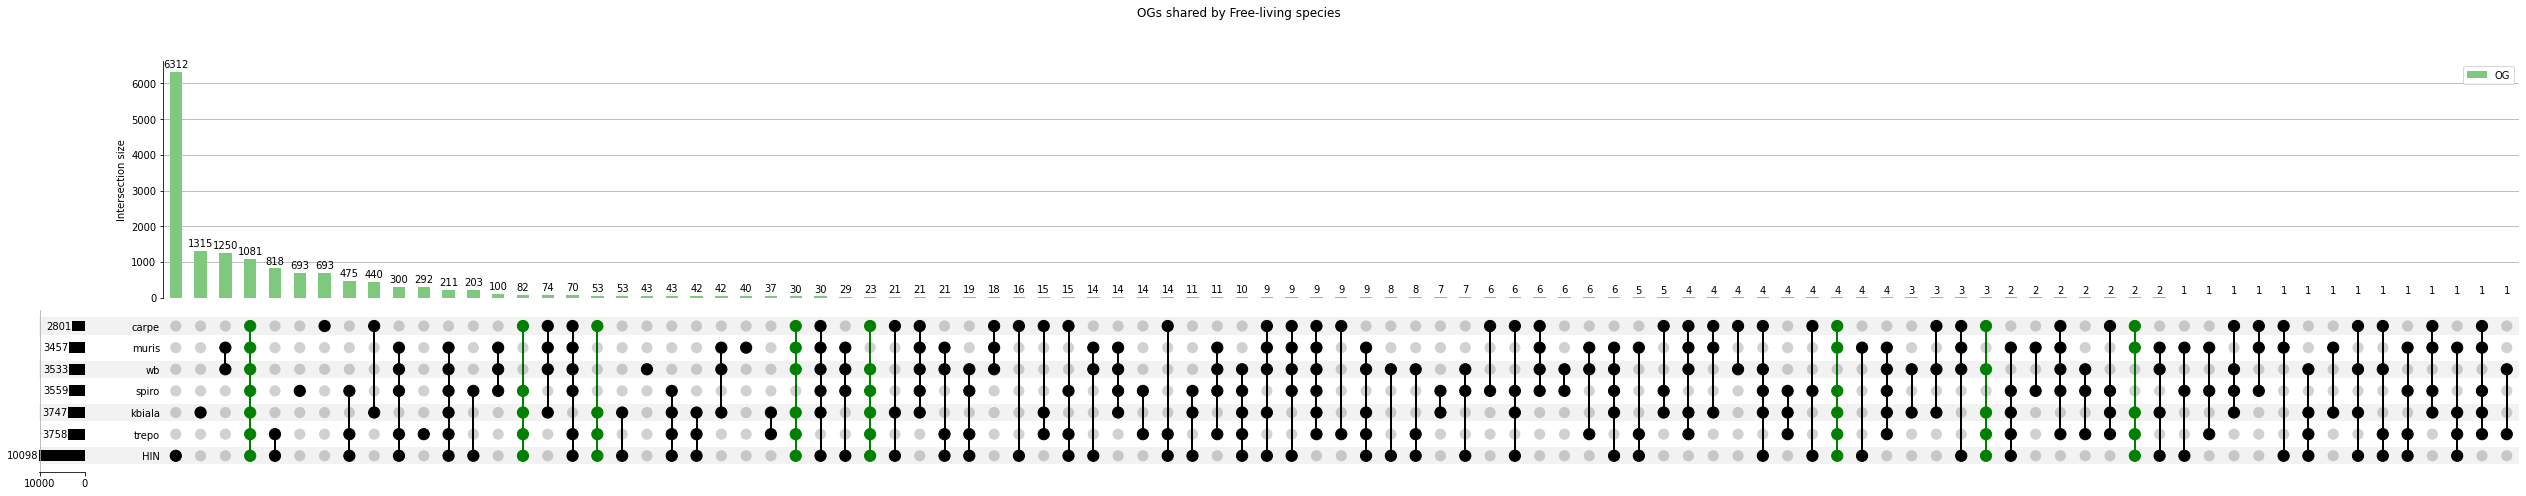

In [6]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Upset plot for only OG"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).set_index(df_count.spiro >= 1, append=True).set_index(
    df_count.wb >= 1, append=True).set_index(df_count.muris >= 1, append=True).set_index(df_count.trepo >= 1, append=True
                                                                                             ).set_index(df_count.kbiala >= 1, append=True).set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=0,
              show_counts=True, sort_categories_by="cardinality", sort_by="cardinality")  # disable the default bar chart


upset.add_stacked_bars(by="Type", colors=cm.Accent,
                       title="Intersection size", elements=10)

upset.style_subsets(present=["HIN", "trepo", "kbiala", "carpe"],
                    facecolor="green",
                    label="OGs shared by Free-living species")

upset.plot()
plt.suptitle("OGs shared by Free-living species")
plt.show()